In [15]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import griddata
import seaborn as sns

In [16]:
ball_r = 1.43 / 12
sz_right = 8.5 / 12
sz_left = -8.5 / 12
df = pd.read_csv("Group B/Hoberg 6-22-22/SFG at ATL 6-22-22.csv")

In [17]:
def inStrikeZone(ball_x, ball_y, ball_radius, sz_left, sz_right, sz_top, sz_bot):

	zeroed_sz_top = (sz_top - sz_bot)/2
	zeroed_sz_bot = (sz_bot - sz_top)/2
	zeroed_ball_y = ball_y - (sz_top + sz_bot)/2
	
	if(ball_x <= (sz_right + ball_radius) 
		 and ball_x >= (sz_left - ball_radius)
		 and ball_y <= (sz_top + ball_radius)
		 and ball_y >= (sz_bot - ball_radius)):

			if(abs(ball_x) > sz_right and abs(zeroed_ball_y) > zeroed_sz_top
					and (((abs(ball_x) - sz_right)**2 + (abs(zeroed_ball_y) - zeroed_sz_top)**2)**0.5) > ball_radius):
						return False
			else:
				return True
				
	return False

In [18]:
def is_in_strike_zone(ball_center_x, ball_center_y, ball_radius,
                      strike_zone_left, strike_zone_right, strike_zone_top,
                      strike_zone_bottom):
    if (ball_center_x >= strike_zone_left and ball_center_x <= strike_zone_right
      and ball_center_y <= strike_zone_top
      and ball_center_y >= strike_zone_bottom):
        return True
    if (ball_center_x < strike_zone_left):
        closest_x = strike_zone_left
    elif (ball_center_x > strike_zone_right):
        closest_x = strike_zone_right
    else:
        closest_x = ball_center_x

    if (ball_center_y > strike_zone_top):
        closest_y = strike_zone_top
    elif (ball_center_y < strike_zone_bottom):
        closest_y = strike_zone_bottom
    else:
        closest_y = ball_center_y

    distance = ((ball_center_x - closest_x)**2 +
              (ball_center_y - closest_y)**2)**0.5
    if distance <= ball_radius:
        return True

    return False




In [19]:
def scalePitch(top_avg, bot_avg, sz_left, sz_right, sz_top, sz_bot, ball_x,
               ball_y):
    bottom_scal = bot_avg/sz_bot
    top_scal = top_avg/sz_top
    scal = (bottom_scal+top_scal)/2

    yNew = ball_y*scal
    return yNew

In [20]:
df['detectStrike1'] = df.apply(lambda x: is_in_strike_zone(
  x.plate_x, x.plate_z, ball_r,sz_left, sz_right, x.sz_top, x.sz_bot),
                               axis=1)

In [21]:
df['detectStrike2'] = df.apply(lambda x: inStrikeZone(
  x.plate_x, x.plate_z, ball_r, sz_left, sz_right, x.sz_top, x.sz_bot),
                               axis=1)

In [22]:
differences = df[df["detectStrike1"] != df['detectStrike2']]
print(len(differences))

0


False count: 8


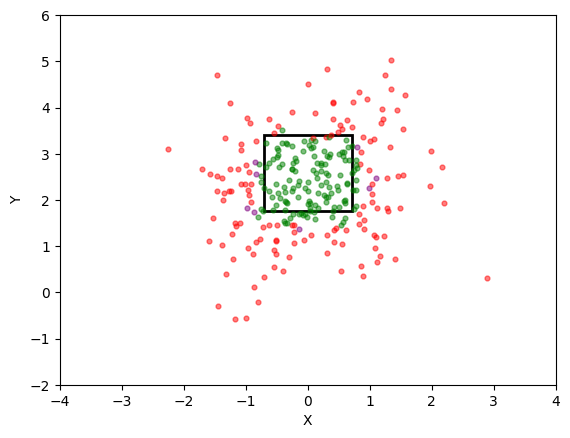

<Figure size 800x400 with 0 Axes>

In [23]:
sz_top = df.sz_top[0]
sz_bot = df.sz_bot[0]
ball_X = list(df['plate_x'])
ball_Y = list(df['plate_z'])
description = list(df['description'])
false_count = 0

ballIn = list(df['detectStrike1'])
ball_radius = ball_r
fig, ax = plt.subplots()
plt.figure(figsize=(8, 4))
strike_zone = plt.Rectangle((sz_left, sz_bot),
                            sz_right - sz_left,
                            sz_top - sz_bot,
                            edgecolor='black',
                            facecolor='none',
                            linewidth=2)
ax.add_patch(strike_zone)
missed_call_indexes = []
for i in range(len(ball_X)):
    if ballIn[i]:
        if description[i] == "ball":
            false_count += 1
            missed_call_indexes.append(i)
            ax.scatter(ball_X[i],
                     ball_Y[i],
                     s=ball_radius * 100,
                     c='purple',
                     alpha=0.5)
        else:
            ax.scatter(ball_X[i],
                 ball_Y[i],
                 s=ball_radius * 100,
                 c='green',
                 alpha=0.5)

    else:
        if description[i] == "called_strike":
            false_count += 1
            missed_call_indexes.append(i)
            ax.scatter(ball_X[i],
                 ball_Y[i],
                 s=ball_radius * 100,
                 c='purple',
                 alpha=0.5)
        else:
            ax.scatter(ball_X[i], ball_Y[i], s=ball_radius * 100, c='red', alpha=0.5)

print(f"False count: {false_count}")

ax.set_xlim([-4, 4])
ax.set_ylim([-2, 6])

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [24]:
missed_calls = pd.DataFrame()

In [25]:
for index in missed_call_indexes:
    missed_calls = pd.concat([missed_calls,df.iloc[index]], axis = 1)
missed_calls = missed_calls.T

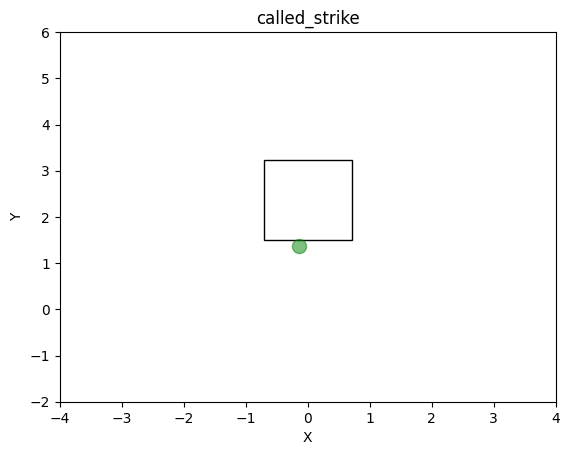

<Figure size 800x800 with 0 Axes>

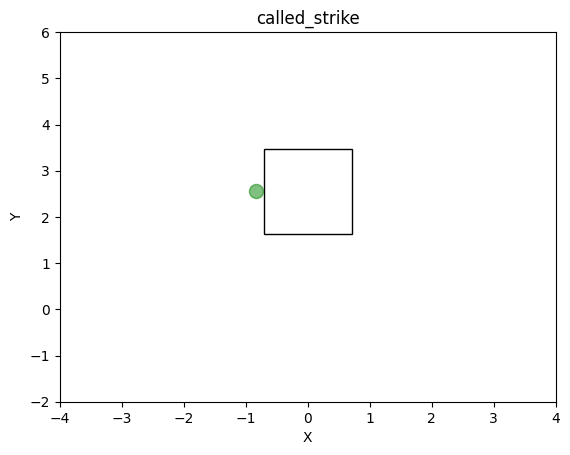

<Figure size 800x800 with 0 Axes>

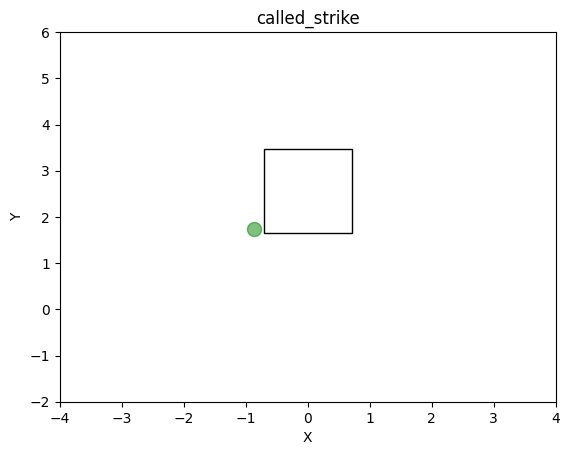

<Figure size 800x800 with 0 Axes>

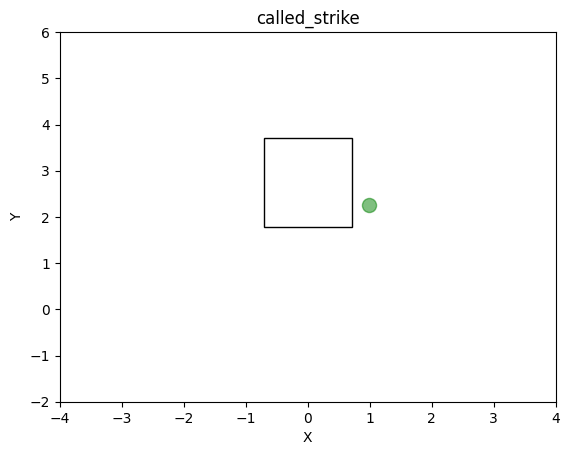

<Figure size 800x800 with 0 Axes>

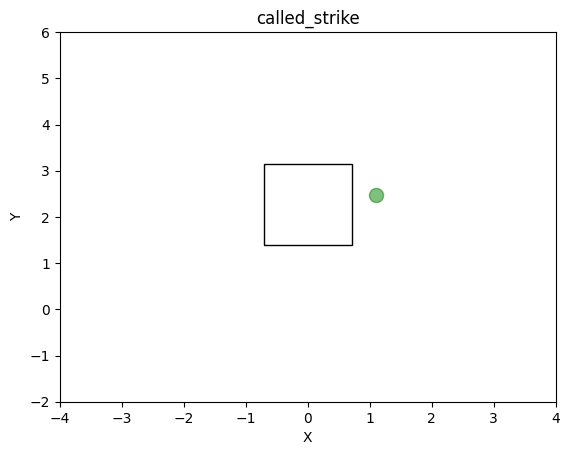

<Figure size 800x800 with 0 Axes>

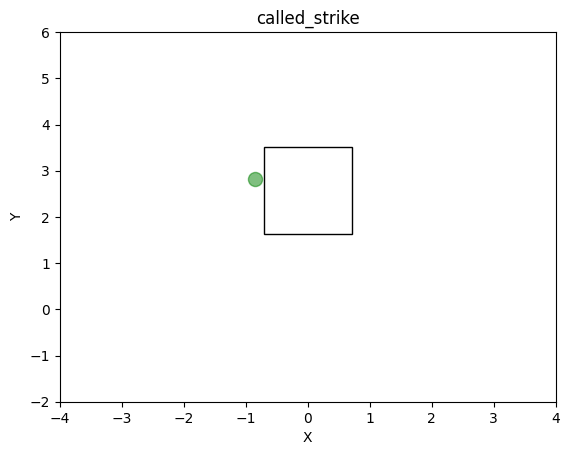

<Figure size 800x800 with 0 Axes>

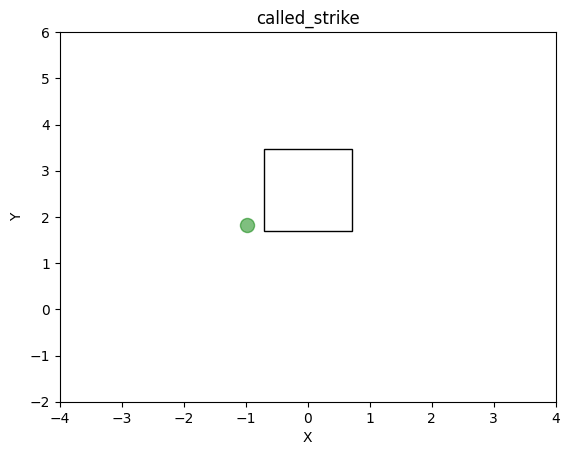

<Figure size 800x800 with 0 Axes>

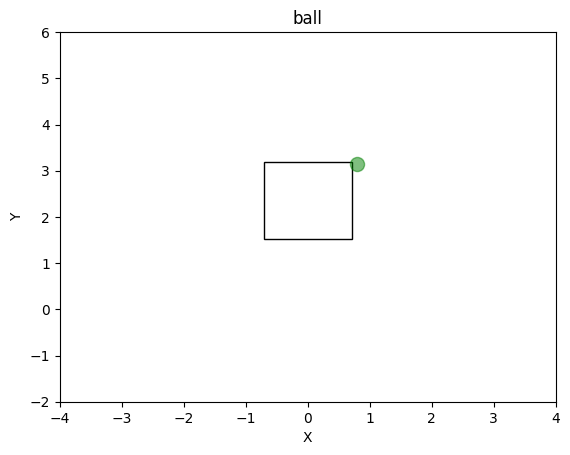

<Figure size 800x800 with 0 Axes>

In [27]:
for i in missed_call_indexes:
    fig, ax = plt.subplots()
    plt.title(missed_calls['description'][i])
    plt.figure(figsize=(8, 8))
    strike_zone = plt.Rectangle((sz_left, missed_calls["sz_bot"][i]),
                                sz_right - sz_left,
                                missed_calls["sz_top"][i] - missed_calls["sz_bot"][i],
                                edgecolor='black',
                                facecolor='none',
                                linewidth=1)
    ax.add_patch(strike_zone)

    ax.scatter(missed_calls["plate_x"][i],
                     missed_calls["plate_z"][i],
                     s=1.43*72,
                     c='green',
                     alpha=0.5)

    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 6])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [30]:
out_events = []
for i in range(len(df)):
    if type(df['events'][i])!= float:
        if "out" in df['events'][i]:
            out_events.append(i)

In [33]:
out_count = 0 
innings = []
current_inning = 1
for index, row in df.iterrows():
    if index in out_events:
        out_count += 1
        if out_count == 6:
            out_count = 0
            current_inning += 1
        innings.append(current_inning)

        
    else:
        innings.append(current_inning)

In [34]:
df['innings'] = innings

In [35]:
average_top = df['sz_top'].mean()

In [36]:
average_bot = df['sz_bot'].mean()

In [37]:
top_avg = sz_top.mean()
bot_avg = sz_bot.mean()
scaledY= df.apply(lambda X: scalePitch(top_avg,bot_avg,sz_left,sz_right,X.sz_top,X.sz_bot,X.plate_x,X.plate_z), axis =1)
df['scaledY'] = scaledY

False count: 8


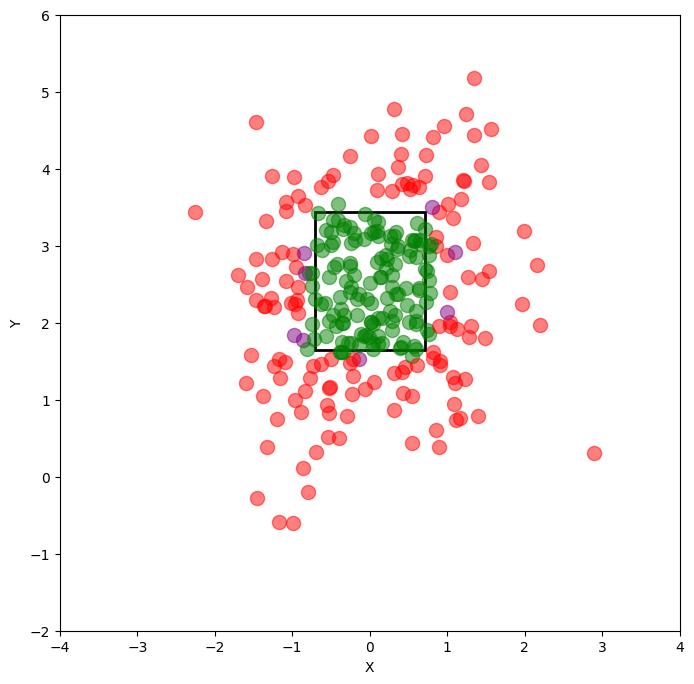

In [38]:
sz_top = average_top
sz_bot = average_bot
ball_X = list(df['plate_x'])
ball_Y = list(df['scaledY'])
description = list(df['description'])
false_count = 0

ballIn = list(df['detectStrike1'])
ball_radius = ball_r
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
strike_zone = plt.Rectangle((sz_left, sz_bot),
                            sz_right - sz_left,
                            sz_top - sz_bot,
                            edgecolor='black',
                            facecolor='none',
                            linewidth=2)
ax.add_patch(strike_zone)
missed_call_indexes = []
for i in range(len(ball_X)):
    if ballIn[i]:
        if description[i] == "ball":
            false_count += 1
            missed_call_indexes.append(i)
            ax.scatter(ball_X[i],
                     ball_Y[i],
                     s=1.43*72,
                     c='purple',
                     alpha=0.5)
        else:
            ax.scatter(ball_X[i],
                 ball_Y[i],
                 s=1.43*72,
                 c='green',
                 alpha=0.5)

    else:
        if description[i] == "called_strike":
            false_count += 1
            missed_call_indexes.append(i)
            ax.scatter(ball_X[i],
                 ball_Y[i],
                 s=1.43*72,
                 c='purple',
                 alpha=0.5)
        else:
            ax.scatter(ball_X[i], ball_Y[i], s=1.43*72, c='red', alpha=0.5)

print(f"False count: {false_count}")

ax.set_xlim([-4, 4])
ax.set_ylim([-2, 6])

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

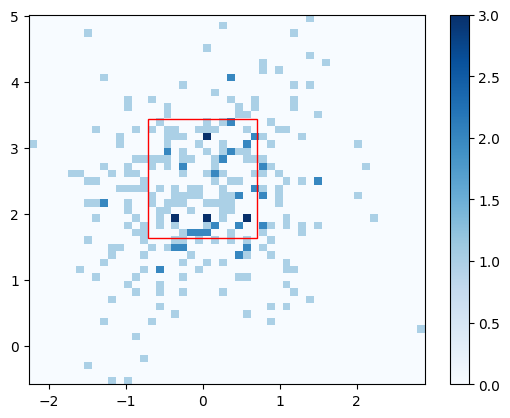

In [40]:

plt.hist2d(x=df['plate_x'], y=df['plate_z'], bins=50, cmap='Blues')
plt.colorbar()
rect = plt.Rectangle((sz_left, sz_bot), sz_right-sz_left, sz_top-sz_bot,
                         linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the plot
ax = plt.gca()
ax.add_patch(rect)
